### Classifier based on a fully connected network

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import imdb

In [43]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [44]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")

In [45]:
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]

### Model 1

In [46]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None),
tf.keras.layers.Dense(64, activation = "tanh"),
tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dense(1, activation='softmax') 
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1280128   
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,290,497
Trainable params: 1,290,497
No

In [47]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [48]:
history = model.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/10
80/80 [==============================] - 6s 62ms/step - loss: 0.3671 - accuracy: 0.4987 - val_loss: 0.2578 - val_accuracy: 0.5053
Epoch 2/10
80/80 [==============================] - 5s 65ms/step - loss: 0.2325 - accuracy: 0.4987 - val_loss: 0.2893 - val_accuracy: 0.5053
Epoch 3/10
80/80 [==============================] - 5s 57ms/step - loss: 0.2032 - accuracy: 0.4987 - val_loss: 0.2675 - val_accuracy: 0.5053
Epoch 4/10
80/80 [==============================] - 5s 64ms/step - loss: 0.1751 - accuracy: 0.4987 - val_loss: 0.3072 - val_accuracy: 0.5053
Epoch 5/10
80/80 [==============================] - 5s 57ms/step - loss: 0.1580 - accuracy: 0.4987 - val_loss: 0.3072 - val_accuracy: 0.5053
Epoch 6/10
80/80 [==============================] - 4s 54ms/step - loss: 0.1412 - accuracy: 0.4987 - val_loss: 0.3156 - val_accuracy: 0.5053
Epoch 7/10
80/80 [==============================] - 5s 69ms/step - loss: 0.1303 - accuracy: 0.4987 - val_loss: 0.3368 - val_accuracy: 0.5053
Epoch 8/10
80

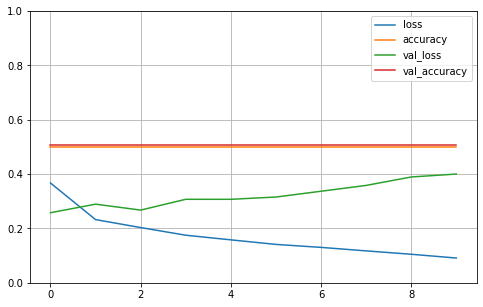

In [49]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### Model 2  zmieniona funkcja softmax na sigmoid oraz optimizer adam na rmsprop

In [50]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(128, activation='tanh', input_shape=(10000,)),
tf.keras.layers.Dropout(0.3, noise_shape=None, seed=None),
tf.keras.layers.Dense(64, activation = "tanh"),
tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
tf.keras.layers.Dense(32, activation='tanh'),
tf.keras.layers.Dense(1, activation='sigmoid') 
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 128)               1280128   
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,290,497
Trainable params: 1,290,497
No

In [51]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [52]:
history = model.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/10
80/80 [==============================] - 17s 197ms/step - loss: 0.3720 - accuracy: 0.8322 - val_loss: 0.2653 - val_accuracy: 0.8957
Epoch 2/10
80/80 [==============================] - 5s 61ms/step - loss: 0.2356 - accuracy: 0.9061 - val_loss: 0.2564 - val_accuracy: 0.8982
Epoch 3/10
80/80 [==============================] - 5s 64ms/step - loss: 0.1974 - accuracy: 0.9221 - val_loss: 0.2741 - val_accuracy: 0.8938
Epoch 4/10
80/80 [==============================] - 5s 65ms/step - loss: 0.1756 - accuracy: 0.9298 - val_loss: 0.2922 - val_accuracy: 0.8909
Epoch 5/10
80/80 [==============================] - 4s 51ms/step - loss: 0.1585 - accuracy: 0.9360 - val_loss: 0.3056 - val_accuracy: 0.8855
Epoch 6/10
80/80 [==============================] - 4s 50ms/step - loss: 0.1398 - accuracy: 0.9433 - val_loss: 0.3633 - val_accuracy: 0.8690
Epoch 7/10
80/80 [==============================] - 4s 50ms/step - loss: 0.1286 - accuracy: 0.9474 - val_loss: 0.3526 - val_accuracy: 0.8801
Epoch 8/10


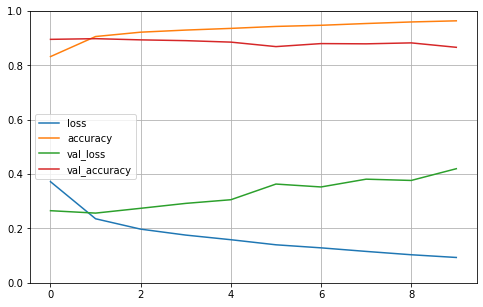

In [53]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [54]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 2s 5ms/step - loss: 0.4197 - accuracy: 0.8664


[0.41974717378616333, 0.8664000034332275]